# Probabilistic Roadmap


In this notebook you'll expand on previous random sampling exercises by creating a graph from the points and running A*.

1. Load the obstacle map data
2. Sample nodes (use KDTrees here)
3. Connect nodes (use KDTrees here)
4. Visualize graph
5. Define heuristic
6. Define search method
7. Execute and visualize

We'll load the data for you and provide a template for visualization.

In [2]:
import networkx as nx

In [3]:
nx.__version__ # should be 2.1

'2.1'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString
from queue import PriorityQueue

%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = 14, 14

## Step 1 - Load Data

In [7]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


## Step 2 - Sample Points


You may want to limit the z-axis values.

In [17]:
xmin = np.min(data[:, 0] - data[:, 3])
xmax = np.max(data[:, 0] + data[:, 3])

ymin = np.min(data[:, 1] - data[:, 4])
ymax = np.max(data[:, 1] + data[:, 4])

zmin = 0
zmax = 10

In [18]:
def collides(polygons, point):
    _point = Point(point[0], point[1])
    for (p, height) in polygons:
        if p.contains(_point) and point[2] <= height:
            return True
    return False

In [19]:
from sklearn.neighbors import KDTree
import numpy as np

In [20]:
def extract_polygons(data):

    polygons = []
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        height = alt + d_alt
        corners = [
            (north-d_north, east+d_east),
            (north-d_north, east-d_east),
            (north+d_north, east-d_east),
            (north+d_north, east+d_east), 
        ]
        p = Polygon(corners)
        polygons.append((p, height))

    return polygons


In [21]:
polygons = extract_polygons(data)

num_samples = 300

xvals = np.random.uniform(xmin, xmax, num_samples)
yvals = np.random.uniform(ymin, ymax, num_samples)
zvals = np.random.uniform(zmin, zmax, num_samples)

samples = list(zip(xvals, yvals, zvals))

points = []
for point in samples:
    if not collides(polygons, point):
        points.append(point)
print(len(points))

203


## Step 3 - Connect Nodes

Now we have to connect the nodes. There are many ways they might be done, it's completely up to you. The only restriction being no edge connecting two nodes may pass through an obstacle.


NOTE: You can use `LineString()` from the `shapely` library to create a line. Additionally, `shapely` geometry objects have a method `.crosses` which return `True` if the geometries cross paths, for instance your `LineString()` with an obstacle `Polygon()`!

In [26]:
def can_connect(p1, p2):
    if p1 is p2:
        return False
    l = LineString([
        (p1[0], p1[1]), 
        (p2[0], p2[1])
    ])
    for (p, height) in polygons:
        if p.crosses(l) and height >= min(p1[2], p2[2]):
            return False
    return True

def create_graph():
    g = nx.Graph()
    tree = KDTree(points)
    for point in points:
        (distances, indices) = tree.query([point], k=20, return_distance=True)
        for (d, i) in zip(distances[0], indices[0]):
            if can_connect(point, points[i]):
                g.add_edge(point, points[i], distance=d)
    return g

g = create_graph()
                
# TODO: connect nodes
# Suggested method
    # 1) cast nodes into a graph called "g" using networkx
    # 2) write a method "can_connect()" that:
        # casts two points as a shapely LineString() object
        # tests for collision with a shapely Polygon() object
        # returns True if connection is possible, False otherwise
    # 3) write a method "create_graph()" that:
        # defines a networkx graph as g = Graph()
        # defines a tree = KDTree(nodes)
        # test for connectivity between each node and 
            # k of it's nearest neighbors
        # if nodes are connectable, add an edge to graph
    # Iterate through all candidate nodes!

## Step 4 - Visualize Graph

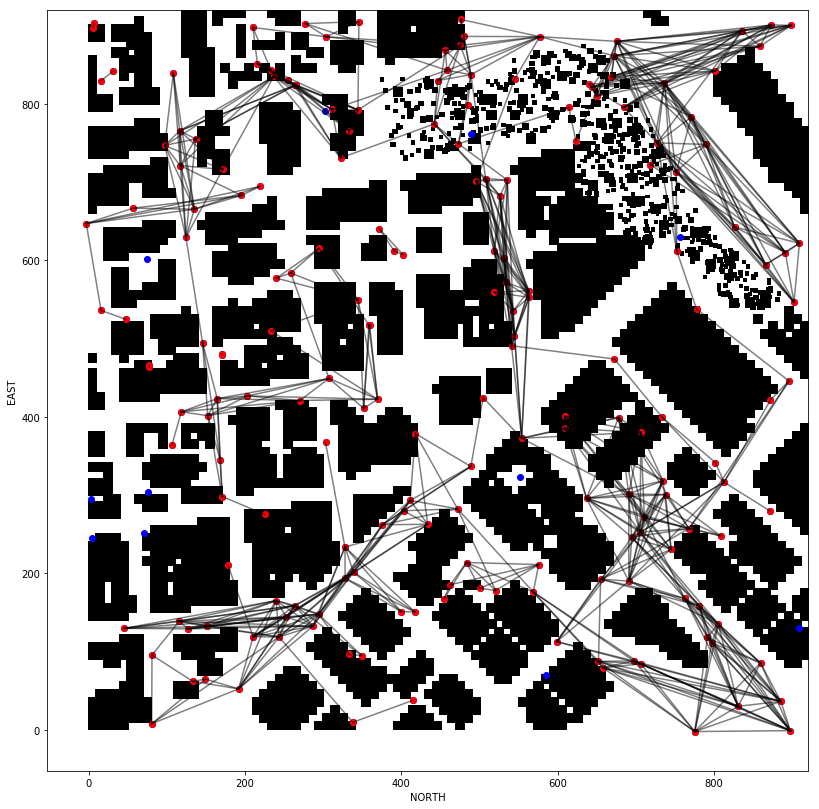

In [27]:
# Create a grid map of the world
from grid import create_grid
# This will create a grid map at 1 m above ground level
grid = create_grid(data, 1, 1)

fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')

nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

# If you have a graph called "g" these plots should work
# Draw edges
for (n1, n2) in g.edges:
   plt.plot([n1[1] - emin, n2[1] - emin], [n1[0] - nmin, n2[0] - nmin], 'black' , alpha=0.5)

# Draw all nodes connected or not in blue
for n1 in points:
   plt.scatter(n1[1] - emin, n1[0] - nmin, c='blue')
    
# Draw connected nodes in red
for n1 in g.nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='red')

plt.xlabel('NORTH')
plt.ylabel('EAST')

plt.show()

## Step 5 - Define Heuristic

In [ ]:
def heuristic(n1, n2):
    # TODO:
    return 0

## Step 6 - Complete A*

In [ ]:
def a_star(graph, heuristic, start, goal):
    """Modified A* to work with NetworkX graphs."""
    
    # TODO: complete
    return []



## Step 7 - Visualize Path

In [ ]:
fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')

# Add code to visualize path here

plt.xlabel('NORTH')
plt.ylabel('EAST')

plt.show()

[solution](/notebooks/Probabilistic-Roadmap-Solution.ipynb)